In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist.keys()

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


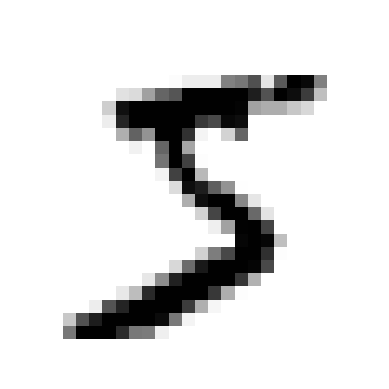

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

some_digit = X.loc(0)[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [4]:
print(y[0])
print(type(y[0]))

5
<class 'str'>


In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# Binary Classification 


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [13]:
from sklearn.metrics import precision_score, recall_score 

print('Precision Score:', precision_score(y_train_5, y_train_pred)) 
print('Recall Score:', recall_score(y_train_5, y_train_pred)) 

Precision Score: 0.8370879772350012
Recall Score: 0.6511713705958311


In [14]:
from sklearn.metrics import f1_score 

print("F1 Score:", f1_score(y_train_5, y_train_pred) )

F1 Score: 0.7325171197343846


In [15]:
y_scores = sgd_clf.decision_function([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_scores

array([2164.22030239])

In [17]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)

In [18]:
y_some_digit_pred

array([ True])

In [19]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [21]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [23]:
def plot_precision_recalls_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], label="precisions")
    plt.plot(thresholds, recalls[:-1], label="recalls")


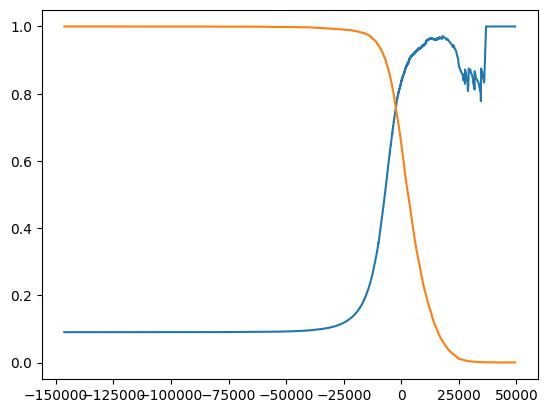

In [24]:
plot_precision_recalls_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
threshold_90_prediction = thresholds[np.argmax(precisions >= 90)]
threshold_90_prediction

-146348.5672617385

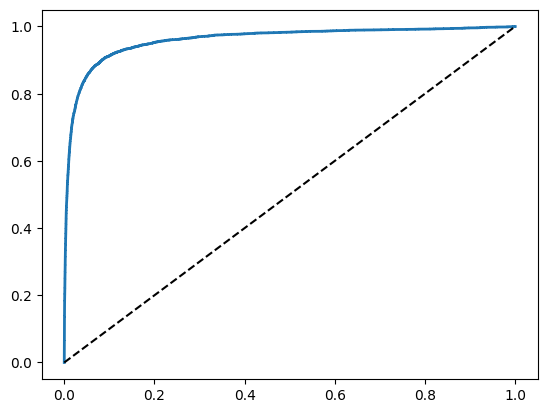

In [26]:
from sklearn.metrics import roc_curve 


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


0.9604938554008616

### RandomForest Classifier vs SGDClassifier 
##### Comparision of ROC Curve and ROC AUC Score

In [32]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42) 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")




In [33]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [34]:
y_scores_forest = y_probas_forest[:,1] #Keeping the second column to use as the postive scores 

In [36]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

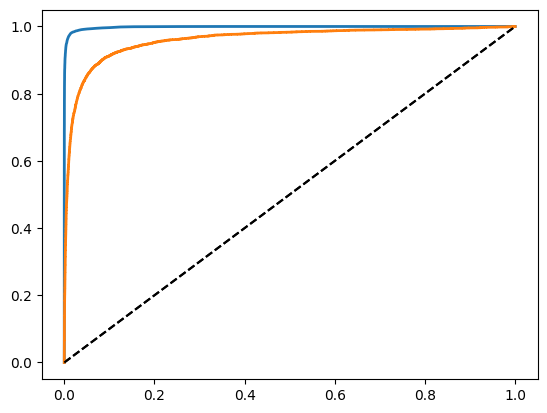

In [41]:
plot_roc_curve(fpr_forest, tpr_forest)
plot_roc_curve(fpr, tpr) 

In [42]:
print("Random Forest Tree Area Under the Curve:", roc_auc_score(y_train_5, y_scores_forest))
print("SGDClassifier Area Under the Curve:", roc_auc_score(y_train_5, y_scores))

Random Forest Tree Area Under the Curve: 0.9983436731328145
SGDClassifier Area Under the Curve: 0.9604938554008616


### Multiclass Classification

In [56]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [59]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [64]:
print(sgd_clf.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [66]:
from sklearn.multiclass import OneVsOneClassifier 

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [70]:
ovo_clf.decision_function([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([[2.66666696, 3.66666714, 5.33333258, 8.33333319, 0.6666669 ,
        9.33333315, 0.66666684, 2.66666841, 5.33333214, 6.33333275]])

In [71]:
len(ovo_clf.estimators_)

45

In [73]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [74]:
forest_clf.predict_proba([some_digit])

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [75]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [76]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

### Error Analysis

In [78]:
y_train_predict = cross_val_predict(sgd_clf, X_train_scale, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_predict)
conf_mx